In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loaders import load_features

In [6]:
features = load_features()
features_ = features.drop(columns=['video_id', '_faces']) #.dropna()
features_

,category_id,publish_weekday,publish_hour,like_ratio,likes_per_view,dislikes_per_view,comments_per_view,title_num_chars,title_num_words,title_num_uppercase_words,...,faces_angry,faces_disgust,faces_fear,faces_happy,faces_neutral,faces_sad,faces_surprise,text_area,text_centroid_x,text_centroid_y
0,NaN,4,7,0.844573,0.007707,0.001418,0.001312,45,7,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
1,NaN,6,6,0.917645,0.024260,0.002177,0.002617,43,15,1,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
2,NaN,4,17,0.947740,0.045891,0.002531,0.007336,43,13,0,...,0,0,0,0,0,0,0,0.419853,25.809107,55.878284
3,NaN,0,2,0.941463,0.006934,0.000431,0.001329,76,15,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
4,NaN,0,1,0.937500,0.003057,0.000204,0.003057,55,9,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73364,NaN,4,16,0.993766,0.078203,0.000491,0.007581,52,8,1,...,0,0,0,0,0,0,1,0.000000,NaN,NaN
73365,NaN,4,1,0.993674,0.056356,0.000359,0.003696,26,5,0,...,0,0,0,0,0,0,0,0.047794,60.500000,32.000000
73366,NaN,4,17,0.978982,0.045073,0.000968,0.003743,84,17,10,...,0,0,2,0,0,0,0,0.000000,NaN,NaN
73367,NaN,3,17,0.985465,0.034086,0.000503,0.002312,35,6,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN


In [7]:
dropped_columns = set()

In [8]:
# simple variance check
from sklearn.feature_selection import VarianceThreshold

var_threshold = VarianceThreshold()
var_threshold.fit(features_)
zero_variance_columns = set(features_.columns[~var_threshold.get_support()])
features_ = features_.drop(columns=zero_variance_columns)
dropped_columns |= zero_variance_columns
zero_variance_columns

{'description__amaz',
 'description__appl',
 'description__bbc',
 'description__homepod',
 'description__subscrib',
 'description__vogu',
 'description__youtub',
 'faces_disgust',
 'faces_neutral',
 'faces_sad',
 'tag__apple tv',
 'tag__breaking news',
 'tag__carrera',
 'tag__full hd',
 'tag__how to',
 'tag__india',
 'tag__indian food',
 'tag__mac mini',
 'tag__ps4',
 'tag__robert downey jr',
 'tag__sebastian stan',
 'tag__talk show',
 'tag__us news',
 'title__amaz',
 'title__appl',
 'title__atla',
 'title__autostrada',
 'title__aveng',
 'title__beauti',
 'title__bowl',
 'title__buffet',
 'title__espn',
 'title__everyth',
 'title__famili',
 'title__fortnit',
 'title__gadget',
 'title__hd',
 'title__homepod',
 'title__india',
 'title__infin',
 'title__jame',
 'title__lebron',
 'title__marvel',
 'title__offici',
 'title__ruf',
 'title__shoot',
 'title__wolf'}

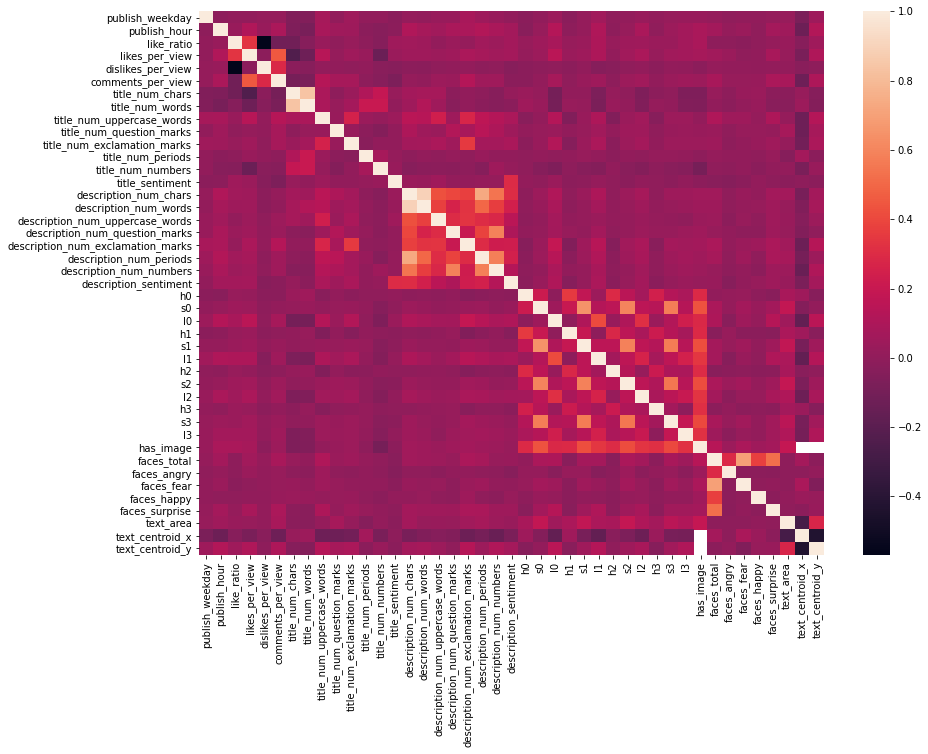

In [9]:
words = [col for col in features_.columns if col.startswith('title__') or col.startswith('description__')]
without_words = features_.drop(columns=words)
plt.figure(figsize=(14, 10))
sns.heatmap(without_words.corr())

In [10]:
obviously_related_pairs = [
    ('likes_per_view', 'dislikes_per_view'),
    ('title_num_chars', 'title_num_words'),
    ('description_num_chars', 'description_num_words'),
]

for kept, dropped in obviously_related_pairs:
    dropped_columns.add(dropped)
    features_ = features_.drop(columns=[dropped])

In [40]:
from sklearn.feature_selection import SelectPercentile, chi2

features_noempty = features_.dropna()
features_tested = features_noempty.drop(columns=['category_id', 'title_sentiment', 'description_sentiment'])
chi2_selector = SelectPercentile(chi2, percentile=80)
chi2_selector.fit(features_tested, features_noempty['category_id'])
print(features_tested.columns[chi2_selector.get_support()])
print(chi2_selector.scores_[chi2_selector.get_support()])

Index(['publish_weekday', 'publish_hour', 'likes_per_view', 'title_num_chars',
       'title_num_uppercase_words', 'title_num_question_marks',
       'title_num_exclamation_marks', 'title_num_periods', 'title_num_numbers',
       'title__2018',
       ...
       's3', 'l3', 'faces_total', 'faces_angry', 'faces_fear', 'faces_happy',
       'faces_surprise', 'text_area', 'text_centroid_x', 'text_centroid_y'],
      dtype='object', length=106)
[3.14282860e+01 3.00652731e+02 3.82418463e+00 1.09195626e+03
 8.37131798e+02 1.39290109e+02 1.63801632e+02 7.53799337e+01
 2.12505938e+02 1.43406931e+02 1.30439076e+02 1.32435500e+02
 3.24728261e+00 2.74905660e+01 5.51951360e+01 1.54526316e+01
 6.23121770e+01 1.74048383e+01 7.03348701e+01 7.93200539e+01
 1.65704876e+01 7.22818676e+00 3.37333333e+01 1.21919646e+01
 1.54526316e+01 1.14336645e+05 2.77943945e+03 3.82491027e+02
 1.34796075e+03 2.22145498e+03 4.30083837e+03 7.42362554e+01
 9.97993538e+01 3.26757670e+01 2.13857955e+01 1.82153926e+02
 5.036

In [ ]:
import math

features_ = features.drop(columns=['video_id', '_faces']).dropna()
correlations = []
for col_name in features_.columns:
    col = features_[col_name]
    if any(col_name.startswith(prefix) for prefix in ['title__', 'description__', 'tag__']):
        col = col.astype(np.float32)
    corr = features_['category_id'].corr(col)
    if not math.isnan(corr):
        correlations.append((col_name, corr))

correlated_features = sorted([row for row in correlations if 1 > row[1] > 0.1], key=lambda row: -abs(row[1]))

names = [row[0] for row in correlated_features]
values = [row[1] for row in correlated_features]
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.bar(names, values)